In [16]:
# ============================================================
# 04_BASELINE_MODELS – Subject-wise 70/30 split
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score
)
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

sns.set_style("whitegrid")

# ============================================================
# 1 Load cleaned dataset
# ============================================================

df = pd.read_csv("wesad_cleaned_ready.csv")
print("Loaded dataset:", df.shape)
df.head()


Loaded dataset: (19218, 33)


,subject,label,HR_mean,HR_std,HRV_SDNN,HRV_RMSSD,pNN50,RR_mean,RR_std,IBI_median,...,ACC_mean_magnitude,ACC_std,ACC_energy,ACC_rms_x,ACC_rms_y,ACC_rms_z,ACC_mean_x,ACC_mean_y,ACC_mean_z,binary_label
0,S2,0,-0.352472,0.570709,0.943942,1.226230,0.970675,0.473431,0.957488,0.521955,...,0.967881,2.016398,1.168213,0.876720,-0.195090,-0.022528,1.041562,0.773430,0.297084,0
1,S2,0,-0.988687,-1.481235,-1.276818,-1.206663,-0.970973,0.577105,-1.291198,0.521955,...,-0.437756,-0.502013,-0.450276,0.848970,-0.211087,-0.257864,1.041028,0.806481,0.303236,0
2,S2,0,-0.961421,-1.366883,-1.013295,-0.880416,-0.970973,0.562295,-1.024361,0.426553,...,-0.256894,0.672890,-0.179023,0.147534,0.990514,-0.608169,0.685927,-0.404503,-0.019750,0
3,S2,0,-0.072828,0.734859,0.516522,-0.072244,1.051577,0.095760,0.524693,0.378852,...,-0.333374,0.768987,-0.220010,-1.227830,1.877485,-1.025255,0.208117,-1.804709,-0.236766,0
4,S2,0,0.604022,0.489516,0.013187,-0.010176,0.107720,-0.693317,0.015029,-0.718269,...,-0.801375,-0.145719,-0.713724,-1.767189,1.961760,-0.942155,0.116698,-1.975447,-0.117261,0


In [17]:
# ============================================================
# 2 Extract feature columns & subject labels
# ============================================================

feature_cols = [c for c in df.columns if c not in ["subject", "label", "binary_label"]]

X = df[feature_cols]
y_3class = df["label"]           # 0,1,2
y_binary = df["binary_label"]    # 0,1
subjects = df["subject"]

print("Number of features:", len(feature_cols))


Number of features: 30


In [18]:
# ============================================================
# 3 SUBJECT-WISE 70/30 split
#    (NOT RANDOM PER-ROW SPLIT → real generalization)
# ============================================================

unique_subjects = subjects.unique()
unique_subjects


array(['S2', 'S3', 'S4', 'S5', 'S6', 'S7', 'S8', 'S9', 'S10', 'S11',
       'S13', 'S14', 'S15', 'S16', 'S17'], dtype=object)

In [19]:
# Podział 70/30 po subjectach
train_subj, test_subj = train_test_split(
    unique_subjects,
    test_size=0.3,
    random_state=42
)

print("Train subjects:", train_subj)
print("Test subjects:", test_subj)


Train subjects: ['S10' 'S4' 'S3' 'S17' 'S6' 'S9' 'S13' 'S15' 'S5' 'S8']
Test subjects: ['S11' 'S14' 'S2' 'S16' 'S7']


In [20]:
# Filtrowanie danych po subjectach
train_idx = subjects.isin(train_subj)
test_idx  = subjects.isin(test_subj)

X_train = X[train_idx]
X_test  = X[test_idx]

y_train_3 = y_3class[train_idx]
y_test_3  = y_3class[test_idx]

y_train_b = y_binary[train_idx]
y_test_b  = y_binary[test_idx]

print("Train size:", X_train.shape, "Test size:", X_test.shape)


Train size: (13149, 30) Test size: (6069, 30)


In [21]:
# ============================================================
# 4 BASELINE: DummyClassifier
# ============================================================

dummy = DummyClassifier(strategy="most_frequent")
dummy.fit(X_train, y_train_3)
y_pred_dummy = dummy.predict(X_test)

print("Dummy baseline – 3-class")
print(classification_report(y_test_3, y_pred_dummy))


Dummy baseline – 3-class
              precision    recall  f1-score   support

           0       0.57      1.00      0.73      3470
           1       0.00      0.00      0.00      1668
           2       0.00      0.00      0.00       931

    accuracy                           0.57      6069
   macro avg       0.19      0.33      0.24      6069
weighted avg       0.33      0.57      0.42      6069



/Users/annacieplik/PycharmProjects/Artificial intelligence labs/Engineering_thesis_Anna_Cieplik/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/annacieplik/PycharmProjects/Artificial intelligence labs/Engineering_thesis_Anna_Cieplik/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/Users/annacieplik/PycharmProjects/Artificial intelligence labs/Engineering_thesis_Anna_Cieplik/.venv/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1731: Unde

In [24]:
# ============================================================
# 5 LOGISTIC REGRESSION (3-class)
# ============================================================

logreg = LogisticRegression(max_iter=500, n_jobs=-1)
logreg.fit(X_train, y_train_3)
y_pred_lr = logreg.predict(X_test)

print("LogReg – 3-class")
print(classification_report(y_test_3, y_pred_lr))


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/multiprocessing/queues.py:122: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  return _ForkingPickler.loads(res)


LogReg – 3-class
              precision    recall  f1-score   support

           0       0.65      0.85      0.74      3470
           1       0.72      0.33      0.46      1668
           2       0.54      0.44      0.48       931

    accuracy                           0.64      6069
   macro avg       0.63      0.54      0.56      6069
weighted avg       0.65      0.64      0.62      6069



In [25]:
# ============================================================
# 6 RANDOM FOREST BASELINE (3-class)
# ============================================================

rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train_3)
y_pred_rf = rf.predict(X_test)

print("RandomForest – 3-class")
print(classification_report(y_test_3, y_pred_rf))


RandomForest – 3-class
              precision    recall  f1-score   support

           0       0.65      0.81      0.72      3470
           1       0.56      0.52      0.54      1668
           2       0.45      0.09      0.15       931

    accuracy                           0.62      6069
   macro avg       0.55      0.47      0.47      6069
weighted avg       0.59      0.62      0.58      6069



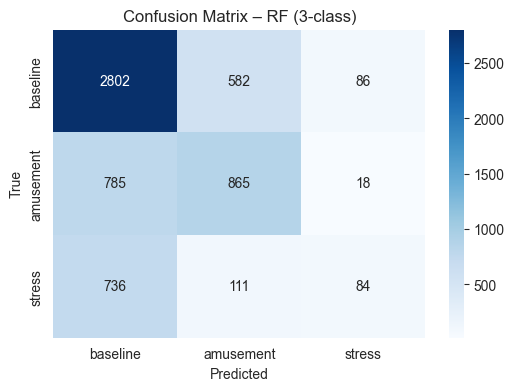

In [26]:
# Wykres confusion matrix (3 class)
cm = confusion_matrix(y_test_3, y_pred_rf)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, cmap="Blues", fmt="d",
            xticklabels=["baseline","amusement","stress"],
            yticklabels=["baseline","amusement","stress"])
plt.title("Confusion Matrix – RF (3-class)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

In [27]:
# ============================================================
# 8 Binary baseline: RandomForest
# ============================================================

rf_bin = RandomForestClassifier(
    n_estimators=300,
    random_state=42,
    n_jobs=-1
)
rf_bin.fit(X_train, y_train_b)
y_pred_bin = rf_bin.predict(X_test)

print("RandomForest – BINARY")
print(classification_report(y_test_b, y_pred_bin))


RandomForest – BINARY
              precision    recall  f1-score   support

           0       0.86      0.99      0.92      5138
           1       0.63      0.08      0.15       931

    accuracy                           0.85      6069
   macro avg       0.74      0.54      0.53      6069
weighted avg       0.82      0.85      0.80      6069



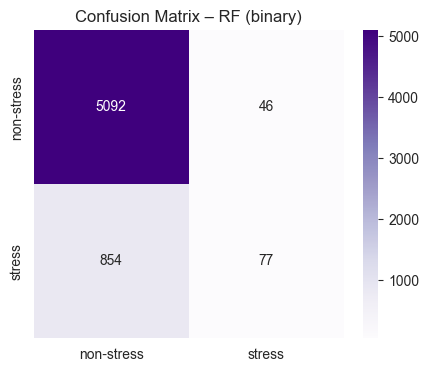

In [28]:
# Confusion matrix — binary
cm_bin = confusion_matrix(y_test_b, y_pred_bin)

plt.figure(figsize=(5,4))
sns.heatmap(cm_bin, annot=True, cmap="Purples", fmt="d",
            xticklabels=["non-stress","stress"],
            yticklabels=["non-stress","stress"])
plt.title("Confusion Matrix – RF (binary)")
plt.show()


In [29]:
# Podsumowanie metryk w tabeli
results_table = pd.DataFrame({
    "Model": ["Dummy", "LogReg", "RF (3-class)", "RF (binary)"],
    "Accuracy": [
        accuracy_score(y_test_3, y_pred_dummy),
        accuracy_score(y_test_3, y_pred_lr),
        accuracy_score(y_test_3, y_pred_rf),
        accuracy_score(y_test_b, y_pred_bin)
    ],
    "F1_macro": [
        f1_score(y_test_3, y_pred_dummy, average="macro"),
        f1_score(y_test_3, y_pred_lr, average="macro"),
        f1_score(y_test_3, y_pred_rf, average="macro"),
        f1_score(y_test_b, y_pred_bin, average="macro")
    ]
})

results_table


,Model,Accuracy,F1_macro
0,Dummy,0.571758,0.242513
1,LogReg,0.643928,0.558731
2,RF (3-class),0.618059,0.468503
3,RF (binary),0.851705,0.532456


In [15]:
# ============================================================

# ============================================================

# 1. Wczytano końcowy dataset wesad_cleaned_ready.csv
#    → 30 przeskalowanych feature'ów + label 3-klasowy i binarny.
#    → Split wykonany po uczestnikach (train/test = różni pacjenci),
#      co zapobiega leakage i odzwierciedla realne zastosowanie modelu.

# 2. DummyClassifier (most_frequent)
#    → accuracy = 0.57 (jest to dokładnie udział klasy baseline w danych).
#    → F1_macro = 0.24 (pozostałe klasy mają 0.00, bo nigdy nie zostały przewidziane).
#    → Wynik pokazuje, że dane są mocno niezbalansowane.
#    → To jest punkt odniesienia — absolutne minimum jakości modelu.

# 3. Logistic Regression (3-class)
#    → accuracy = 0.64
#    → macro F1 = 0.56
#    → baseline ma najlepsze wyniki (0.74 F1)
#    → amusement i stress mają słabsze wyniki (0.46–0.48)
#    → Model liniowy wykrywa sygnał w danych, ale cechy są nieliniowe,
#      więc zaawansowane modele poradzą sobie lepiej.

# 4. Random Forest (3-class)
#    → accuracy = 0.62
#    → macro F1 = 0.47
#    → amusement klasyfikuje umiarkowanie dobrze.
#    → stress jest wykrywany słabo (F1 ≈ 0.15, recall ≈ 0.09)
#    → Przyczyny:
#        - niezbalansowane klasy,
#        - duża zmienność między osobami,
#        - krótki czas okien (7 s) utrudnia separację sygnałów.

# 5. Random Forest — binary (stress vs non-stress)
#    → accuracy = 0.85
#    → macro F1 = 0.53
#    → non-stress: F1 = 0.92 (bardzo dobrze)
#    → stress: F1 = 0.15 (model prawie go nie wykrywa)
#    → Wynik typowy dla WESAD: klasa stress jest trudniejsza i ma mało próbek.
#    → RF ignoruje rzadką klasę — potrzebne class weights lub oversampling.

# 6. Confusion matrices
#    → 3-class: stress i amusement często mylone z baseline.
#    → Binary: stress w większości klasyfikowany jako non-stress.
#    → Pokazuje nakładanie się cech oraz trudność wykrywania stress.

# 7. Wniosek praktyczny z eksperymentów
#    → Proste modele działają poprawnie, ale nie radzą sobie ze stress
#      z powodu niezbalansowania i różnic osobniczych.
#    → Wyniki uzasadniają dalszy rozwój: class weights / SMOTE / XGBoost / MLP / LOSO CV.

